In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Logistic Regression

In [3]:
sess = tf.InteractiveSession()

In [4]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [5]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [6]:
sess.run(tf.global_variables_initializer())

In [7]:
y = tf.matmul(x,W) + b

In [8]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

In [9]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [10]:
for _ in range(1000):
    batch = mnist.train.next_batch(100)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

In [11]:
W_trained = sess.run(W)

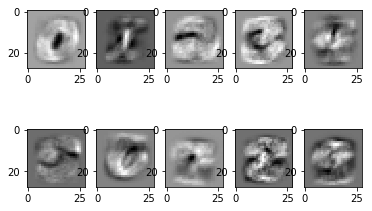

In [12]:
plt.figure(1)
for i in np.arange(10):
    plt.subplot(2,5,i+1)
    plt.imshow(W_trained[:,i].reshape(28,28))
    plt.gray()
plt.show()

In [13]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [14]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [15]:
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9189


Convolutional neural network

In [16]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

In [17]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

First convolutional layer

In [18]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [19]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

In [20]:
x_image = tf.reshape(x, [-1, 28, 28, 1])

In [21]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

Second convolutional layer

In [22]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

Densely connected layer

In [23]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

Dropout

In [24]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

Readout Layer

In [25]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [26]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

with tf.Session() as sess_new:
    sess_new.run(tf.global_variables_initializer())
    # 20,000 training steps will take 0.5-1.0 hours to run. Reduce for testing
    for i in range(20000):
        batch = mnist.train.next_batch(50)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict={
                x: batch[0], y_: batch[1], keep_prob: 1.0})
            print('step %d, training accuracy %g' % (i, train_accuracy))
        if i % 1000 == 0:
            saver.save(sess_new, 'my-model-new', global_step=i)
        train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
    print('test accuracy %g' % accuracy.eval(feed_dict={
      x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.08
step 100, training accuracy 0.84
step 200, training accuracy 0.9
step 300, training accuracy 0.92
step 400, training accuracy 0.92
step 500, training accuracy 0.9
step 600, training accuracy 1
step 700, training accuracy 0.98
step 800, training accuracy 0.98
step 900, training accuracy 1
step 1000, training accuracy 0.9
step 1100, training accuracy 1
step 1200, training accuracy 0.98
step 1300, training accuracy 0.92
step 1400, training accuracy 0.96
step 1500, training accuracy 1
step 1600, training accuracy 0.98
step 1700, training accuracy 0.98
step 1800, training accuracy 0.98
step 1900, training accuracy 1
test accuracy 0.9742
